In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from lnc_analysis import*

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_dir = '/Users/maoyabassiouni/Documents/DATA/Projects/OLNI'

# Data

In [5]:
data_f = os.path.join(data_dir ,'model_inputs', 'df_model_all_annual.csv')
df_ts_ = open_lnc_data(data_f)

In [6]:
df_ts_ = standardize_to_common_mean('LNC', df_ts_, common_mean=18)
trend_result_all = trend_summary_df('LNC_stdm', df_ts_)

In [7]:
df_ts_h = pd.read_csv(os.path.join(data_dir ,'model_inputs', 'df_model_all_annual_CMIP_historical_cal.csv')) 
df_ts_p = pd.read_csv(os.path.join(data_dir ,'model_inputs', 'df_model_all_annual_CMIP_proj_cal.csv')) 

In [8]:
models = ['ACCESS-CM2',
          'CanESM5',
          'CESM2',
          'CNRM-CM6-1',
          'EC-Earth3-Veg-LR',
          'FGOALS-g3',
          'GFDL-CM4',
          'GISS-E2-1-G',
          'IITM-ESM',
          'INM-CM5-0',
          'IPSL-CM6A-LR',
          'KIOST-ESM',
          'MIROC6',
          'MPI-ESM1-2-LR',
          'MRI-ESM2-0',
          'NorESM2-MM',
          'UKESM1-0-LL']

In [9]:
dm = df_ts_p[['year', 'CO2_ssp245']].groupby(['year']).mean()
dm2 = df_ts_p[['year', 'CO2_ssp585']].groupby(['year']).mean()

In [10]:
dm.loc[2050].values, dm.loc[2015].values, dm.loc[2050].values/dm.loc[2015].values

(array([0.00039172]), array([0.00031005]), array([1.26339307]))

In [11]:
dm2.loc[2050].values, dm2.loc[2015].values, dm2.loc[2050].values/dm2.loc[2015].values

(array([0.00042964]), array([0.00031034]), array([1.38443081]))

# Trends & models

In [12]:
for cmip_label, variant in [['vcmax25_ssp245', 'gs_sunlit_ww_stdm'],
                           ['vcmax25_ssp245', 'gs_sunlit_ww_fixCo2_stdm'],
                           ['vcmax25_historical', 'gs_LTavg_sunlit_ww_ssp245Co2_stdm'],
                           ['vcmax25_ssp585', 'gs_sunlit_ww_stdm'],
                           ['vcmax25_ssp585', 'gs_sunlit_ww_fixCo2_stdm'],
                           ['vcmax25_historical', 'gs_LTavg_sunlit_ww_ssp585Co2_stdm'],]:

    vv = []

    for source_id in models:
        vv.append(list(df_ts_p['%s_%s_%s' % (cmip_label, source_id, variant)].values))
    vv = list(zip(*vv))

    df_ts_p['%s_mean_%s' % (cmip_label, variant)] = [np.nanmean(vvi) for vvi in vv]
    df_ts_p['%s_median_%s' % (cmip_label, variant)] = [np.nanmedian(vvi) for vvi in vv]
    df_ts_p['%s_stderr_%s' % (cmip_label, variant)] = [np.nanstd(vvi)/(float(len(models)))**0.5 for vvi in vv]



In [13]:
for k in ['nue', 'gpp', 'vcmax25']:
    for cmip_label, variant in [['%s_ssp245' % k, 'gs_sunlit_ww'],
                               ['%s_ssp245' % k, 'gs_sunlit_ww_fixCo2'],
                               ['%s_historical' % k, 'gs_LTavg_sunlit_ww_ssp245Co2'],
                               ['%s_ssp585' % k, 'gs_sunlit_ww'],
                               ['%s_ssp585' % k, 'gs_sunlit_ww_fixCo2'],
                               ['%s_historical' % k, 'gs_LTavg_sunlit_ww_ssp585Co2'],]:

        vv = []

        for source_id in models:
            vv.append(list(df_ts_p['%s_%s_%s' % (cmip_label, source_id, variant)].values))
        vv = list(zip(*vv))

        df_ts_p['%s_mean_%s' % (cmip_label, variant)] = [np.nanmean(vvi) for vvi in vv]
        df_ts_p['%s_median_%s' % (cmip_label, variant)] = [np.nanmedian(vvi) for vvi in vv]
        df_ts_p['%s_stderr_%s' % (cmip_label, variant)] = [np.nanstd(vvi)/(float(len(models)))**0.5 for vvi in vv]




LNC_stdm 41.67 11.487566852290897 
theilslope-year -32.90235224802195 err 7.283287577568923
theilslope-CO2 -4.518244797461142 err 1.0036769313839717
delta -3.2052675840660174 err -1.2724403651618201

vcmax25_ssp245_median_gs_sunlit_ww_stdm 79.25263000009997 25.561104057309393 -
theilslope-year -53.849759366994654 err 0.49831208209161204
theilslope-CO2 -6.022134508678513 err 0.056070979310146304
delta -15.6207080469498 err -8.876715258491805

vcmax25_ssp585_median_gs_sunlit_ww_stdm 113.49563 36.57195218962775 -
theilslope-year -84.24166843772397 err 0.6292962151655951
theilslope-CO2 -6.043643742741826 err 0.0429707574138138
delta -32.42121456208225 err -22.749956500410054

vcmax25_historical_median_gs_LTavg_sunlit_ww_ssp245Co2_stdm 79.25263000009997 25.561104057309393 :
theilslope-year -43.531575248411485 err 0.08990830236828978
theilslope-CO2 -4.906672981180039 err 0.011406262557210863
delta -12.801203821147755 err -7.344413816536641

vcmax25_historical_median_gs_LTavg_sunlit_ww_ssp58

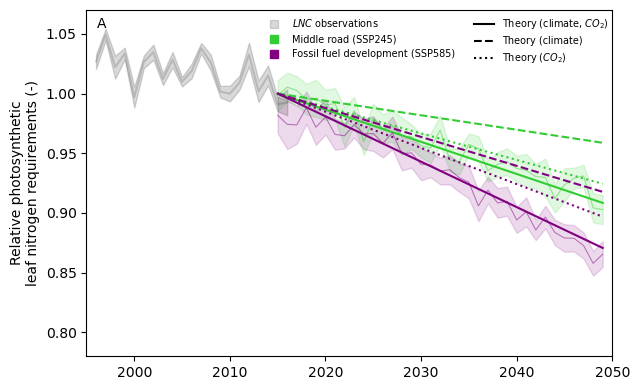

In [14]:
m = 'median'
y_vars = [['LNC_stdm', 'LNC observations', 'k', ''],
          
          ['vcmax25_ssp245_%s_gs_sunlit_ww_stdm' % m, 
           'ssp245 Theory', 'limegreen', '-'],
          ['vcmax25_ssp585_%s_gs_sunlit_ww_stdm'  % m, 
           'ssp585 Theory', 'Purple', '-'],
          
          ['vcmax25_historical_%s_gs_LTavg_sunlit_ww_ssp245Co2_stdm'  % m, 
           'ssp245 only CO$_2$', 'limegreen', ':'],
          ['vcmax25_historical_%s_gs_LTavg_sunlit_ww_ssp585Co2_stdm' % m, 
           'ssp585 only CO$_2$', 'Purple', ':'],

          ['vcmax25_ssp245_%s_gs_sunlit_ww_fixCo2_stdm'  % m, 
           'ssp245 only climate', 'limegreen', '--'],
          ['vcmax25_ssp585_%s_gs_sunlit_ww_fixCo2_stdm'  % m, 
           'ssp585 only climate', 'Purple', '--'],
          
          ]

fig_4_cmip_trends(y_vars, df_ts_, df_ts_h, df_ts_p, 
                y_label='Relative photosynthetic\nleaf nitrogen requirements (-)', 
                  ylim= [0.78, 1.07], xlim=[1995, 2050], figname='../figs/fig_4_cmip_trends.pdf')

In [15]:
#projected trend / obs trend
print(-53.849759366994654/ -32.90235224802195)
print(-84.24166843772397/ -32.90235224802195)

#co2 trend / total trend
print(-43.531575248411485 /-53.849759366994654)
print( -63.46737935995738/-84.24166843772397)

#climate trend / total trend
print(-23.041738821099777 /-53.849759366994654)
print(-49.59377257850643/-84.24166843772397)

#climate trend / CO2 trend
print(-23.041738821099777 /-43.531575248411485)
print(-49.59377257850643/-63.46737935995738)

1.6366537857557597
2.560353977208073
0.8083894108372313
0.753396514301897
0.42788935534635675
0.5887083375511354
0.5293109355591398
0.7814057091790995


In [16]:
vcmax_f = df_ts_p['vcmax25_ssp245_median_gs_sunlit_ww_fixCo2'] / df_ts_p['vcmax25_ssp245_median_gs_sunlit_ww']
df_ts_p['gpp_ssp245_median_gs_sunlit_ww_nodr'] = df_ts_p['gpp_ssp245_median_gs_sunlit_ww'] * vcmax_f

vcmax_f = 1 / df_ts_p['vcmax25_ssp245_median_gs_sunlit_ww']
df_ts_p['gpp_ssp245_median_gs_sunlit_ww_nodr_c'] = df_ts_p['gpp_ssp245_median_gs_sunlit_ww'] * vcmax_f

vcmax_f = df_ts_p['vcmax25_ssp585_median_gs_sunlit_ww_fixCo2'] / df_ts_p['vcmax25_ssp585_median_gs_sunlit_ww']
df_ts_p['gpp_ssp585_median_gs_sunlit_ww_nodr'] = df_ts_p['gpp_ssp585_median_gs_sunlit_ww'] * vcmax_f

vcmax_f = 1 / df_ts_p['vcmax25_ssp585_median_gs_sunlit_ww']
df_ts_p['gpp_ssp585_median_gs_sunlit_ww_nodr_c'] = df_ts_p['gpp_ssp585_median_gs_sunlit_ww'] * vcmax_f


In [17]:
y_vars = [['gpp_ssp245_median_gs_sunlit_ww', 'ssp245\nclimate and CO2 acclimation', 'green', 'CO2_ssp245', ''],
          ['gpp_ssp585_median_gs_sunlit_ww', 'ssp585\nclimate and CO2 acclimation', 'purple', 'CO2_ssp585', ''],
          ['gpp_ssp245_median_gs_sunlit_ww_nodr','ssp245\nclimate acclimation', 'green', 'CO2_ssp245', '----'],
          ['gpp_ssp585_median_gs_sunlit_ww_nodr', 'ssp585\nclimate acclimation', 'purple', 'CO2_ssp585', '----'],
          ['gpp_ssp245_median_gs_sunlit_ww_nodr_c', 'ssp245\nno acclimation', 'green', 'CO2_ssp245', '...'],
          ['gpp_ssp585_median_gs_sunlit_ww_nodr_c', 'ssp585\nno acclimation', 'purple', 'CO2_ssp585', '...']]


gpp_ssp245_median_gs_sunlit_ww 0.08243013404357641 0.013932753208823147
gpp_ssp585_median_gs_sunlit_ww 0.13411140446849062 0.01654931932148981
gpp_ssp245_median_gs_sunlit_ww_nodr 0.4042195635597816 0.008962509068243089
gpp_ssp585_median_gs_sunlit_ww_nodr 0.33904667981135617 0.011564034809510232
gpp_ssp245_median_gs_sunlit_ww_nodr_c 0.621533769926758 0.00789175952761228
gpp_ssp585_median_gs_sunlit_ww_nodr_c 0.6174090388700791 0.010173907910572974


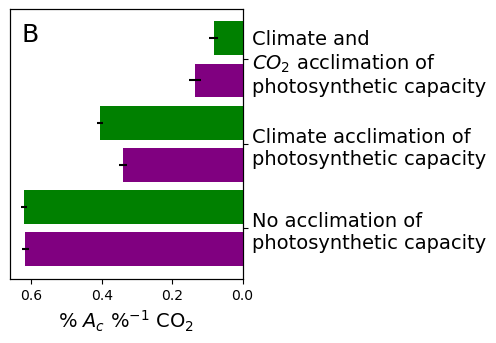

In [26]:
fig = plt.figure(figsize=(3, 3.5))
    
ax0 = fig.add_subplot(1, 1, 1)
ax0.invert_xaxis()


ax0.set_yticklabels([]) # Hide the left y-axis tick-labels
ax0.set_yticks([]) # Hide the left y-axis ticks
ax1 = ax0.twinx() # Create a twin x-axis


labels = []
for xx, (y_var, label, color, co2_v, pattern) in enumerate(y_vars):
    
    b = beta_co2(df_ts_p[y_var], df_ts_p[y_var].values[0],
            df_ts_p[co2_v], df_ts_p[co2_v].values[0])
    beta = np.nanmedian(b)
    beta_err = np.nanstd(b[(np.isnan(b)==0) &(np.isinf(b)==0)])/np.sqrt(float(len(b)))
    #trend_c, b, a1, a2 = theilslopes(df[y_var].values, df[co2_v].values*10**6, 0.95)
    print(y_var, beta, beta_err)
    #beta = trend_c / np.mean(df_ts_p[y_var])
    ax1.barh(5-xx, beta, color=color, xerr=beta_err)
    labels.append(label)

ax0.set_xlabel(r'% $A_c$ %$^{-1}$ CO$_2$', fontsize=14)
ax1.set_yticks([0.5, 2.5, 4.5])
ax1.set_yticklabels(['No acclimation of\nphotosynthetic capacity', 
                     'Climate acclimation of\nphotosynthetic capacity', 
                     'Climate and\n$CO_2$ acclimation of\nphotosynthetic capacity'], fontsize=14)

ax1.text(.05, .95, 'B', ha='left', va='top', transform=ax1.transAxes, fontsize=18)
plt.savefig('../figs/fig_4_cmip_B.pdf', transparent=True, bbox_inches="tight", pad_inches=0.1)
plt.show()